## Python Visualizations

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'Desktop/CF/Achievement 4/Instacart Basket Analysis/02 Data/Prepared Data/df_4_8.pkl'

In [20]:
path_orig = r'Desktop/CF/Achievement 4/Instacart Basket Analysis'

In [5]:
df= pd.read_pickle(os.path.join(path))

## Bar Chart

<Axes: xlabel='orders_day_of_week'>

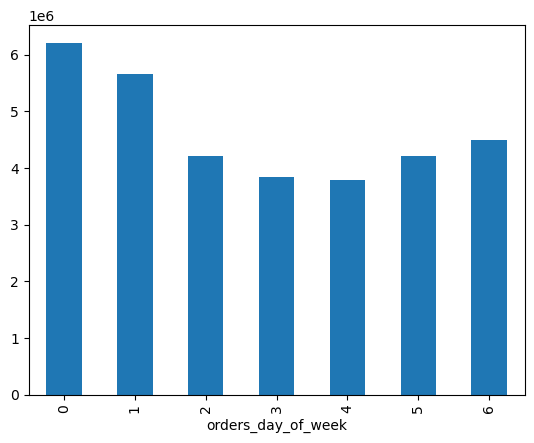

In [6]:
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

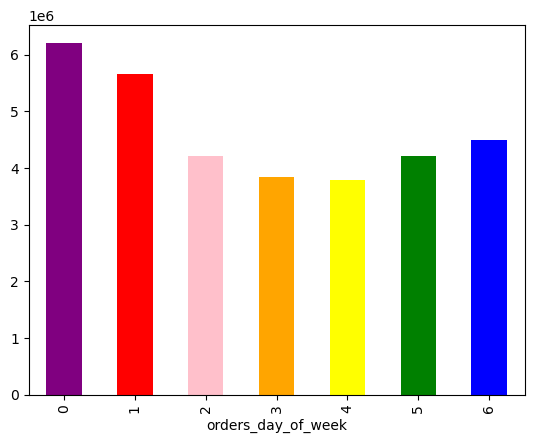

In [7]:
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

## Histogram

In [ ]:
## Needed to data wrangle some outlier prices

<Axes: ylabel='Frequency'>

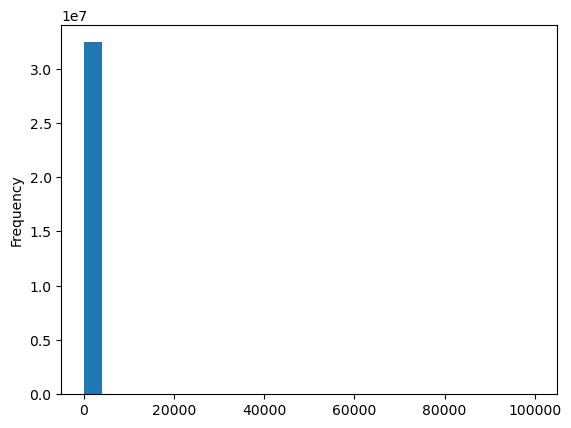

In [8]:
df['prices'].plot.hist(bins = 25)

In [8]:
df['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

## Scatterplot

In [1]:
# Used a scatter plot to wrangle some prices that were higher then the rest

<Axes: xlabel='prices', ylabel='prices'>

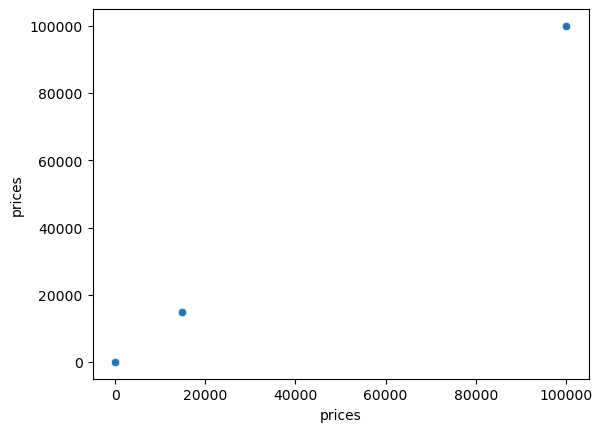

In [9]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [12]:
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,orders_days_since_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,max_order,loyalty_flag,Average_order,Spending_flag,median_order,Frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,4,New customer,1154.792308,High Spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,4,New customer,1154.792308,High Spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,16,Regular customer,114.426619,High Spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
29193269,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
29193270,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,15,Regular customer,451.153540,High Spender,4.0,Frequent customer
29193271,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,12,Regular customer,1178.381871,High Spender,7.0,Frequent customer


In [2]:
# made prices over 100 null values

In [15]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [17]:
df['prices'].max()

25.0

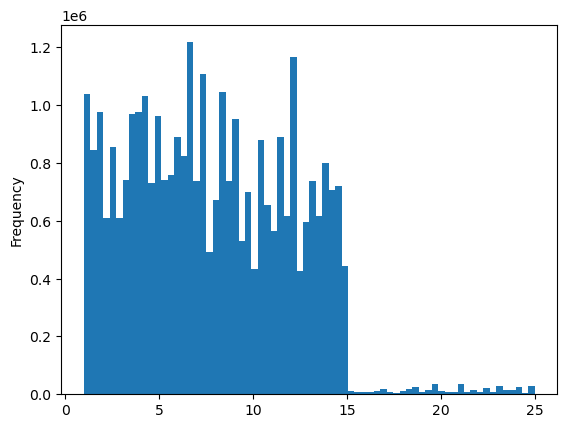

In [19]:
hist = df['prices'].plot.hist(bins = 70)

## Saving Visualizations

In [21]:
bar.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'bar_df.png'))
hist.figure.savefig(os.path.join(path_orig, '04 Analysis','Visualizations', 'hist_df.png'))

In [23]:
df_Line = df[:2000000]


## Creating Sample Data to make  line chart

In [24]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [25]:
Big = df[dev]
small = df[~dev]

In [26]:
len(df)

32434212

In [28]:
len(Big) + len(small)

32434212

In [29]:
df_2 = small[['orders_day_of_week','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


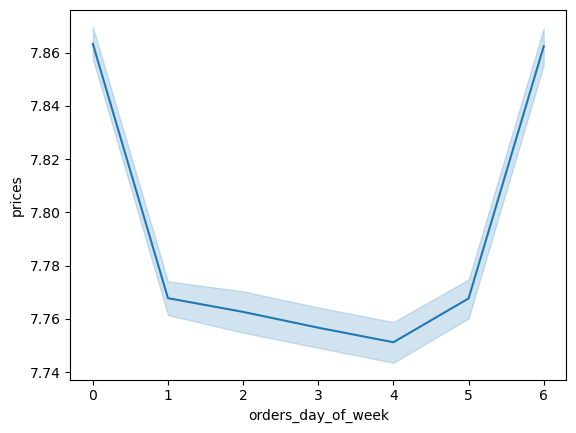

In [30]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')